In [1]:
from enum import Enum
import itertools
import random
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

From Joe Vanderlans, a current constitutional problem:

Imagine that U.S. Supreme Court nominees are only confirmed if the same party holds the presidency and the Senate. What is the expected number of vacancies on the bench in the long run?

You can assume the following:

* You start with an empty, nine-person bench.
* There are two parties, and each has a 50 percent chance of winning the presidency and a 50 percent chance of winning the Senate in each election.
* The outcomes of Senate elections and presidential elections are independent.
* The length of time for which a justice serves is uniformly distributed between zero and 40 years.|

In [2]:
class Party(Enum):
    D = 1
    R = 2

In [3]:
class Justice:
    
    def __init__(self, party):
        self.init_term = random.randint(0,40)
        self.party = party
        self.term = self.init_term

In [4]:
class Bench:
    
    SIZE = 9
    
    def __init__(self):
        self.seats = [None] * self.SIZE
        
    def seat_available(self):
        return None in self.seats
    
    def fill_seat(self, justice):
        for i in range(self.SIZE):
            if self.seats[i] is None:
                self.seats[i] = justice
                break
                
    def add_years(self, num_years):
        for i in range(self.SIZE):
            if self.seats[i] is not None:
                self.seats[i].term -= num_years
                if self.seats[i].term <= 0:
                    self.seats[i] = None
    
    def breakdown(self):
        empty = len([s for s in self.seats if s is None])
        dems = len([s for s in self.seats if s is not None and s.party == Party.D])
        reps = len([s for s in self.seats if s is not None and s.party == Party.R])
            
        return (dems, empty, reps)

In [5]:
def simulate(years):
    president_party = None
    senate_party = None
    bench = Bench()
    for year in itertools.count(step=4):
        yield year, bench
        if year > years:
            break
        
        president_party = random.choice(list(Party))
        senate_party = random.choice(list(Party))
        
        if president_party == senate_party:
            while bench.seat_available():
                bench.fill_seat(Justice(president_party))
        
        bench.add_years(4)

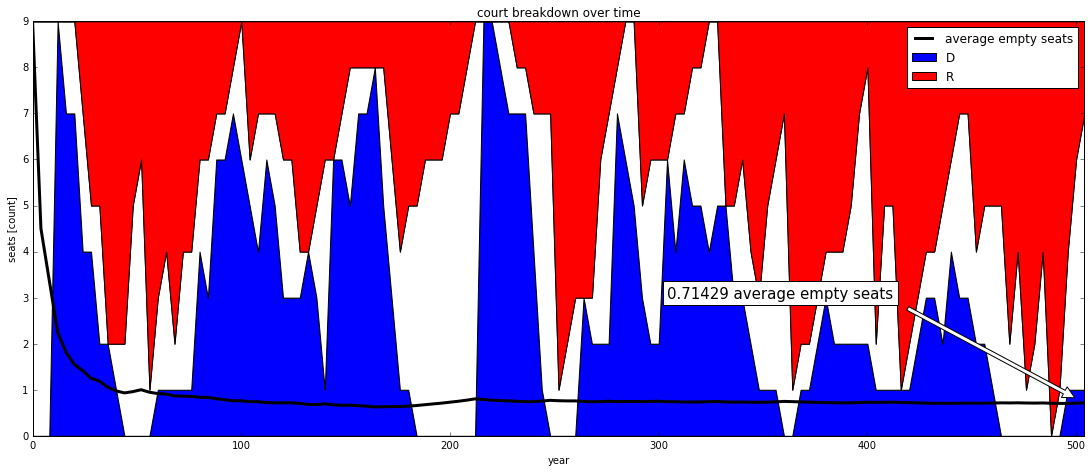

In [6]:
raw_data = [(y,b.breakdown()) for y,b in simulate(500)]
years, benches = list(zip(*raw_data))

y = np.row_stack(list(zip(*benches)))

mean = np.cumsum(y[1]) / ([1] + list(years[1:]))

fig, ax = plt.subplots(1, facecolor='white', figsize=(15,6))
plt.tight_layout(pad=0, w_pad=0.5, h_pad=0)

k = ax.stackplot(years, y, colors=('blue','white','red'), labels=("D","","R"))
ax.plot(years, mean, 'k', linewidth=3, label = "average empty seats")

ax.set_xlim([years[0],years[-1]])
ax.set_xlabel("year")
ax.set_ylabel("seats [count]")
ax.set_title("court breakdown over time")

bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="k", lw=1)

ax.annotate('{0:0.5f} average empty seats'.format(mean[-1]),
            xy=(years[-1], mean[-1]),
            size=15,
            xytext=(years[3*len(years)//5], 3),
            arrowprops=dict(facecolor='white', shrink=0.05),
            bbox=bbox_props)

ax.legend()

plt.show()

In [7]:
def plot_sims(years, simulations):
    fig, ax = plt.subplots(figsize=(14, 10))
    fig.patch.set_facecolor('white')
    plt.subplots_adjust(wspace=0)

    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)

    for sim in simulations:
        ax1.plot(years, sim, linewidth=2, alpha=0.05, color='k')

    ax1.set_xlim([0,years[-1]])
    ax1.set_ylim([0.5,1])
        
    ax2 = plt.subplot2grid((1, 3), (0, 2))
    ax2.xaxis.tick_top()
    ax2.tick_params(axis='y', which='both', labelleft='off', labelright='on')
    ax2.set_ylim(ax1.get_ylim())

    ax2.hist([sim[-1] for sim in simulations], normed=1, orientation='horizontal', color='k', alpha=0.6)

    ax2.yaxis.set_label_position('right')
    ax2.xaxis.set_label_position('top')

    ax1.set_xlabel('year')
    ax1.set_ylabel('empty seats [count]')
    ax2.set_xlabel('probability')
    ax2.set_ylabel(ax1.get_ylabel())

    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    plt.show()

In [8]:
simulations = []

for n in range(100):
    raw_data = [(y,b.breakdown()) for y,b in simulate(20000)]
    years, benches = list(zip(*raw_data))
    y = np.row_stack(list(zip(*benches)))
    mean = np.cumsum(y[1]) / ([1] + list(years[1:]))
    simulations.append(mean)
    

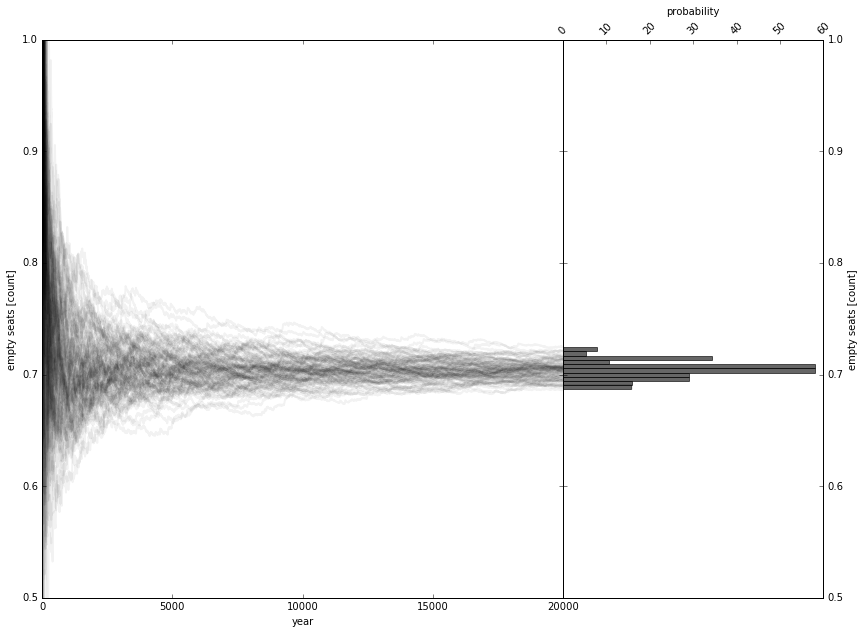

In [9]:
plot_sims(years, simulations)